# 0.0 Imports

In [122]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date as dt
import datetime
from scipy import stats as ss

# 0.1 helper functions

0.2 Loading Data

In [26]:
df_sales_raw = pd.read_csv('/Users/luisfelippe/Data_science_em_Producao/DataScience_em_producao/data/train-2.csv', low_memory=False)
df_store_raw = pd.read_csv('/Users/luisfelippe/Data_science_em_Producao/DataScience_em_producao/data/store.csv', low_memory=False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [27]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
991793,229,3,2013-01-23,8396,687,1,1,0,0,d,c,17410.0,4.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


## Descrição dos dados:

In [28]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [29]:
df1 = df_raw.copy()

In [30]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [31]:
 cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)

cols_new =list(map(snakecase, cols_old))
# rename
df1.columns = cols_new

In [32]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

1.2 Data Dimensions

In [33]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of column: {}'.format(df1.shape[1]))

Number of rows: 1017209
Number of column: 18


1.3 Data Types

In [34]:

# temos que alterar o tipo da coluna date, pois o python entende como object para fazer isso vamos utilizar 
# o metodo do pandas to_datetime()
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [20]:
# coluna_removida = df1.pop('dates')

## 1.4 Check NA

In [62]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.5 Fillout NA

In [61]:
# Competition_distance
#df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x)
# Competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
# competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
# promo2_since_week
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
# promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)



In [57]:
# promo_interval
month_map = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov',12: 'dec'}
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [59]:
df1.sample(5).T

,816075,42745,904840,713935,397249
store,681,376,246,6,60
day_of_week,7,2,4,7,6
date,2013-06-30 00:00:00,2015-06-23 00:00:00,2013-04-11 00:00:00,2013-09-29 00:00:00,2014-07-12 00:00:00
sales,0,5341,7622,0,5589
customers,0,695,988,0,501
open,0,1,1,0,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,c,a,d


In [52]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

1.1

1.1

In [63]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [64]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)

## 1.7 Descriptive Statistical

In [66]:
num_attributes = df1.select_dtypes( include=["int64", "float64"])
cat_attributes = df1.select_dtypes( exclude=["int64", "float64", "datetime64[ns]"])

In [69]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
305701,0,d,c,"Jan,Apr,Jul,Oct",oct
852323,0,a,a,0,may


## 1.7.1 numerical attributes

In [76]:
# central tendency mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns= ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/4234290159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["competition_distance"])


<Axes: xlabel='competition_distance', ylabel='Density'>

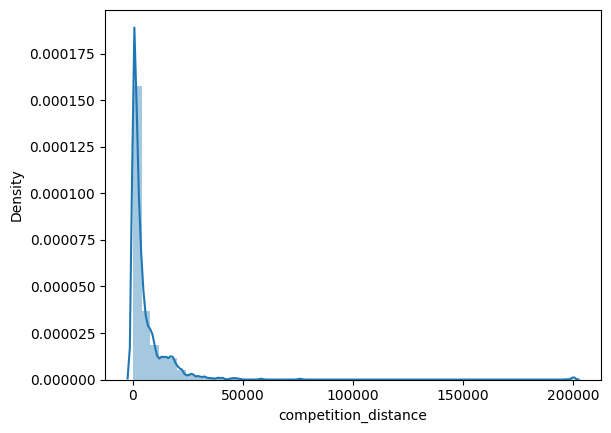

In [82]:
sns.distplot(df1["competition_distance"])

## 1.7.2 Categorical Attributres

In [84]:
cat_attributes.apply (lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

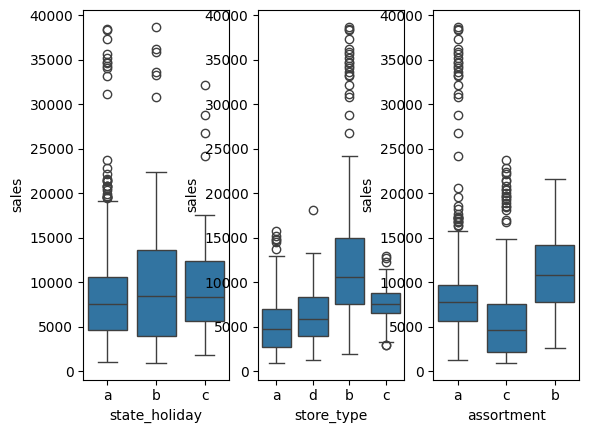

In [97]:
#filtro para pegar dados diferentes de 0 e coluna vendas maior que zero
aux1 = df1[(df1["state_holiday"] != "0") & (df1["sales"] > 0)]
plt.subplot(1, 3, 1)
sns.boxplot(x="state_holiday", y="sales", data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x="store_type", y="sales", data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x="assortment", y="sales", data=aux1)

# Modulo 3

# 2.0 passo 02 - FEATURE ENGINEERING

In [106]:
df2 = df1.copy()

In [ ]:
# from IPython.display import Image
Image( "img/MindMapHypothesis.png")

### 2.1 Mapa mental de hipoteses

## 2.1 Criação das hipoteses 

## 2.1.1 hipoteses loja

**1.** - Lojas com maior numero de funcionarios deveriam vender mais.
**2.** - Lojas com maior estoque deveriam vender mais.
**3.** - lojas com maior porte deveriam vender mais.
**4.** - lojas com menor porte deveriam vender menos.
**5.** - lojas com maior sortimento deveriam vender mais.

## 2.1.2 hipoteses produto

**1.** - Lojas que investem mais em marketing deveriam vender mais.
**2.** - lojas que expoe mais o produto nas vitrinis deveriam vender mais.
**3.** - lojas que tem preços menores nos produtos deveriam vender mais.
**4.** - lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.


## 2.1.3 hipoteses tempo

**1.** - Lojas que tem mais feriados deveriam vender menos.
**2.** - lojas que abrem nos primeiros 6 meses deveriam vender mais.
**3.** - lojas que abrem nos finais de semana deveriam vender mais.

## 2.2 Lista final de hipoteses

**1.** - Lojas que tem mais feriados deveriam vender menos.
**2.** - lojas que abrem nos primeiros 6 meses deveriam vender mais.
**3.** - lojas que abrem nos finais de semana deveriam vender mais.
**4.** - lojas com maior sortimento deveriam vender mais.
**5.** - lojas com competidores mais proximos deveriam vender menos.
**6.** - lojas com competidores a mais tempo deveriam vender mais
**7.** - lojas com promoções ativas por mais tempo deveriam vender mais.
**8.** - lojas com promoções consecutivas a mais tempo deveriam vender mais.

1. Lojas com maior sortimentos deveriam vender mais. 
2. Lojas com competidores mais próximos deveriam vender menos. 
3. Lojas com competidores à mais tempo deveriam vendem mais. 
4. Lojas com promoções ativas por mais tempo deveriam vender mais. 
5. Lojas com mais dias de promoção deveriam vender mais. 
7. Lojas com mais promoções consecutivas deveriam vender mais. 
8. Lojas abertas durante o feriado de Natal deveriam vender mais. 
9. Lojas deveriam vender mais ao longo dos anos. 
10. Lojas deveriam vender mais no segundo semestre do ano. 
11. Lojas deveriam vender mais depois do dia 10 de cada mês. 
12. Lojas deveriam vender menos aos finais de semana. 
13. Lojas deveriam vender menos durante os feriados escolares.

## Feature Engineering

In [139]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [ ]:
# year
df2["year"] = df2["date"].dt.year
# month
df2["month"] = df2["date"].dt.month

# day
df2["day"] = df2["date"].dt.day

# week of year
df2["week_of_year"] = df2["date"].dt.day_of_week
df2["year_week"] = df2["date"].dt.strftime("%Y-%w")
import datetime
# competition since
df2["competition_since"] = df2.apply(lambda x: datetime.datetime(year=x["competition_open_since_year"], month=x["competition_open_since_month"], day=1), axis=1)
df2["compatition_time_month"] = ((df2["date"] - df2["competition_since"] )/30).apply(lambda x: x.days).astype(int)

# promo since
df2["promo_since"] = df2["promo2_since_year"].astype(str) + "-" + df2["promo2_since_week"].astype(str)
df2["promo_since"] = df2["promo_since"].apply(lambda x: datetime.datetime.strptime(x + "-1","%Y-%W-%w") - datetime.timedelta(days=7) )
df2["promo_type_week"] = ((df2["date"] - df2["promo_since"]) /7).apply(lambda x: x.days).astype(int)

# assortment
df2["assortment"] = df2["assortment"].apply( lambda x: "basic" if x == "a" else "extra" if x == "b" else "extended" )

# state holiday 
df2["state_holiday"] = df2["state_holiday"].apply( lambda x: "public_holiday" if x == "a" else "Easter_holiday" if x == "b" else "christmas" if x == "c"  else "regular_day")


In [142]:
df2.sample().T

,430526
store,922
day_of_week,3
date,2014-06-11 00:00:00
sales,6578
customers,641
open,1
promo,0
state_holiday,regular_day
school_holiday,0
store_type,d


# 3.0 PASSO 03 - Filtragem de variaveis 

In [156]:
df3 = df2.copy()

In [157]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,jul,0,2015,7,31,4,2015-5,2008-09-01,84,2015.0-31
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2007-11-01,94,2010.0-13
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2006-12-01,105,2011.0-14
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,jul,0,2015,7,31,4,2015-5,2009-09-01,71,2015.0-31
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2015-04-01,4,2015.0-31


## 3.1 Filtragem de Linhas

In [159]:
df3 = df3[(df3["open"] != 0) & (df3["sales"] > 0)]

## 3.2 Filtragem das Linhas

In [160]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,jul,0,2015,7,31,4,2015-5,2008-09-01,84,2015.0-31
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2007-11-01,94,2010.0-13
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2006-12-01,105,2011.0-14
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,jul,0,2015,7,31,4,2015-5,2009-09-01,71,2015.0-31
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,jul,0,2015,7,31,4,2015-5,2015-04-01,4,2015.0-31


## Filtragem das Colunas

In [161]:
cols_drop = ["customers","open", "month_map"]
df3.drop(cols_drop, axis=1)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,promo_interval,is_promo,year,month,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,0,2015,7,31,4,2015-5,2008-09-01,84,2015.0-31
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,"Jan,Apr,Jul,Oct",0,2015,7,31,4,2015-5,2007-11-01,94,2010.0-13
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,"Jan,Apr,Jul,Oct",0,2015,7,31,4,2015-5,2006-12-01,105,2011.0-14
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,0,0,2015,7,31,4,2015-5,2009-09-01,71,2015.0-31
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,0,2015,7,31,4,2015-5,2015-04-01,4,2015.0-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,...,0,0,2013,1,1,1,2013-2,2006-09-01,77,2013.0-1
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,...,0,0,2013,1,1,1,2013-2,1999-10-01,161,2013.0-1
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,...,"Jan,Apr,Jul,Oct",0,2013,1,1,1,2013-2,2013-01-01,0,2012.0-48
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,...,0,0,2013,1,1,1,2013-2,2013-01-01,0,2013.0-1


# Modulo 04 - Passo 04 - Analise exploratoria dos dados

In [162]:
df4 = df3.copy()

In [182]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'compatition_time_month', 'promo_since'],
      dtype='object')

## 4.1 Analise univariada

### 4.1.1 Response variable

/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/137744109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( np.log1p(df4["sales"]))


<Axes: xlabel='sales', ylabel='Density'>

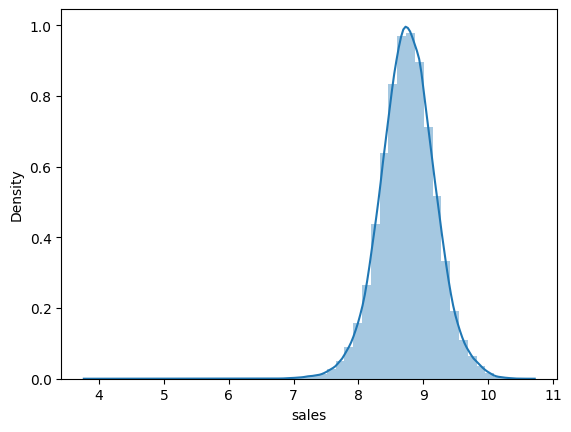

In [165]:
sns.distplot( np.log1p(df4["sales"]))

## 4.2 Analise bivariada

### 4.2.2 Numerical variable

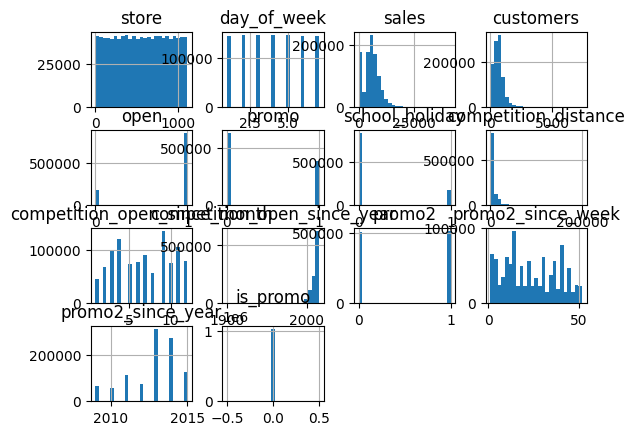

In [171]:
num_attributes.hist(bins=25);

4.1.3 Categorical variable

In [174]:
df4["state_holiday"].drop_duplicates

<bound method Series.drop_duplicates of 0             regular_day
1             regular_day
2             regular_day
3             regular_day
4             regular_day
                ...      
1016776    public_holiday
1016827    public_holiday
1016863    public_holiday
1017042    public_holiday
1017190    public_holiday
Name: state_holiday, Length: 844338, dtype: object>

/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/3915970983.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4["state_holiday"] == "public_holiday"] ["sales"], label="public_holiday", shade=True)
/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/3915970983.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4["state_holiday"] == "Easter_holiday"] ["sales"], label="easter_holiday", shade=True)
/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/3915970983.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4["state_holiday"] == "christmas"] ["sales"], label=

<Axes: xlabel='sales', ylabel='Density'>

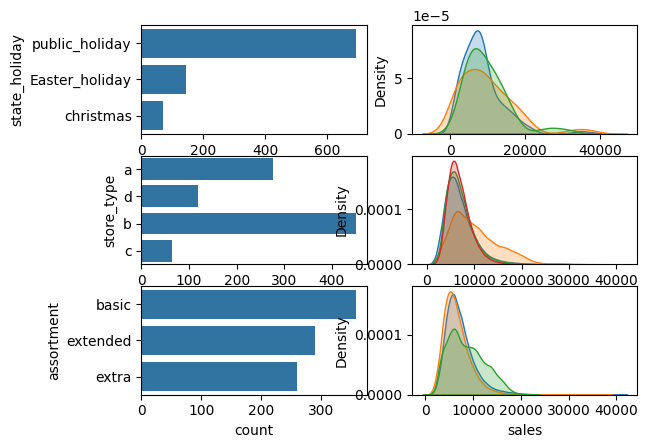

In [192]:
# state_holiday
plt.subplot(3,2,1)
a = df4[df4["state_holiday"] != "regular_day"]
sns.countplot(a["state_holiday"])
plt.subplot(3,2,2)
sns.kdeplot(df4[df4["state_holiday"] == "public_holiday"] ["sales"], label="public_holiday", shade=True)
sns.kdeplot(df4[df4["state_holiday"] == "Easter_holiday"] ["sales"], label="easter_holiday", shade=True)
sns.kdeplot(df4[df4["state_holiday"] == "christmas"] ["sales"], label="christmas", shade=True)
# store_type
plt.subplot(3,2,3)
sns.countplot(a["store_type"])
plt.subplot(3,2,4)
sns.kdeplot(df4[df4["store_type"] == "a"] ["sales"], label="public_holiday", shade=True)
sns.kdeplot(df4[df4["store_type"] == "b"] ["sales"], label="easter_holiday", shade=True)
sns.kdeplot(df4[df4["store_type"] == "c"] ["sales"], label="christmas", shade=True)
sns.kdeplot(df4[df4["store_type"] == "d"] ["sales"], label="christmas", shade=True)

# assortment
plt.subplot(3,2,5)
sns.countplot(a["assortment"])
plt.subplot(3,2,6)
sns.kdeplot(df4[df4["assortment"] == "extended"] ["sales"], label="extended", shade=True)
sns.kdeplot(df4[df4["assortment"] == "basic"] ["sales"], label="basic", shade=True)
sns.kdeplot(df4[df4["assortment"] == "extra"] ["sales"], label="extra", shade=True)


## 4.2 Analise Bivariada

1. Lojas com maior sortimentos deveriam vender mais. 
2. Lojas com competidores mais próximos deveriam vender menos. 
3. Lojas com competidores à mais tempo deveriam vendem mais. 
4. Lojas com promoções ativas por mais tempo deveriam vender mais. 
5. Lojas com mais dias de promoção deveriam vender mais. 
7. Lojas com mais promoções consecutivas deveriam vender mais. 
8. Lojas abertas durante o feriado de Natal deveriam vender mais. 
9. Lojas deveriam vender mais ao longo dos anos. 
10. Lojas deveriam vender mais no segundo semestre do ano. 
11. Lojas deveriam vender mais depois do dia 10 de cada mês. 
12. Lojas deveriam vender menos aos finais de semana. 
13. Lojas deveriam vender menos durante os feriados escolares.

### 1. Lojas com maior sortimentos deveriam vender mais. 


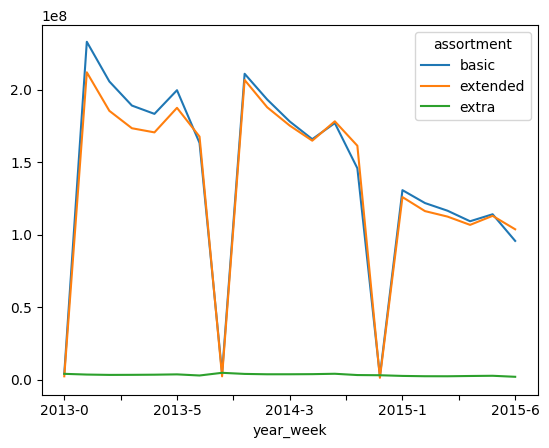

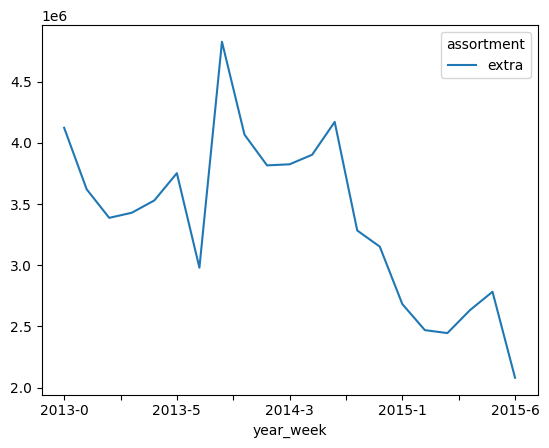

In [ ]:
aux2 = df4[["assortment","sales"]].groupby("assortment").sum().reset_index()
#sns.barplot(x="assortment", y="sales", data=aux2);

aux3 = df4[["year_week", "assortment","sales"]].groupby(["year_week","assortment"]).sum().reset_index()
aux3.pivot(index="year_week", columns="assortment", values="sales").plot();

aux4 = aux3[aux3["assortment"] == "extra"]
aux4.pivot(index="year_week", columns="assortment", values="sales").plot();

# Resposta: lojas com maior assortment vendem menos.

In [208]:
aux4.head()

assortment,basic,extended,extra
year_week,,,
2013-0,4223131,2405637,4122443
2013-1,233119416,212066273,3619619
2013-2,205745088,185485973,3386525
2013-3,189134552,173492533,3428282
2013-4,183401926,170635443,3528782


### 2. Lojas com competidores mais próximos deveriam vender menos. 

2. falsa, pois como observamos lojas com competidores mais proximos vedem mais.

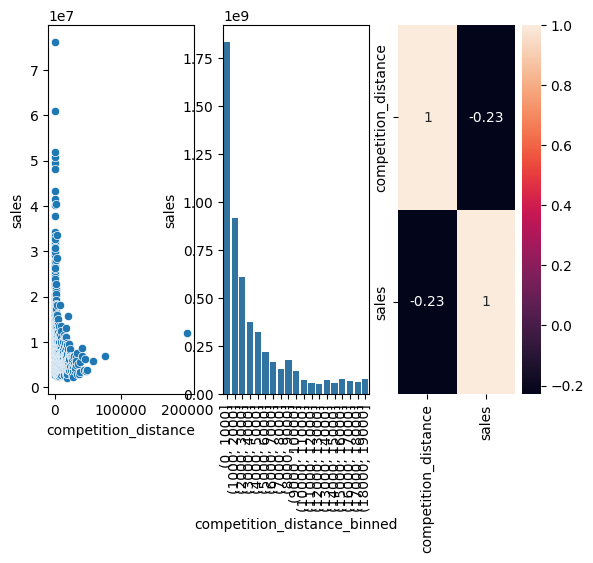

In [235]:

aux_1 = df4[["competition_distance", "sales"]].groupby("competition_distance").sum().reset_index()
plt.subplot(1, 3, 1)
sns.scatterplot(x= "competition_distance", y="sales", data= aux_1);

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000,1000)) # ou seja parte de 0 ate 20k de 1000 em 1000

# agora estou criando uma nova coluna com o metodo cut do pandas
aux_1["competition_distance_binned"] = pd.cut(aux_1["competition_distance"], bins=bins)
aux_2 = aux_1[["competition_distance_binned", "sales"]].groupby("competition_distance_binned").sum().reset_index()
sns.barplot(x="competition_distance_binned", y="sales", data=aux_2);
plt.xticks(rotation=90);

aux_1new = aux_1.select_dtypes(include=[np.number])  # Mantém apenas colunas numéricas
sns.heatmap(aux_1.corr(method="pearson"), annot=True)
plt.subplot(1, 3, 3)
sns.heatmap(aux_1new.corr(method="pearson"), annot=True);

# pelo o que estamos vendo no grafico é completamente diferente do que acreditavamos, regioes proximas vendem mais
# falsa a premissa da hipotese.

# quando temos graficos muito granulares podemos usar o scatter 


### 3. Lojas com competidores à mais tempo deveriam vendem mais. 

3. Falsa, as lojas com competidores por mais tempo, vendem menos. Conforme podemos ver abaixo:

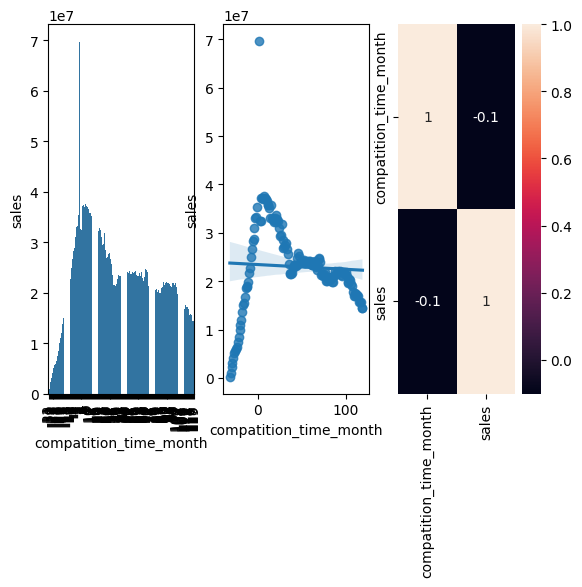

In [247]:
plt.subplot(1,3,1)
aux__1 = df4[["compatition_time_month", "sales"]].groupby("compatition_time_month").sum().reset_index()
aux__2 = aux__1[(aux__1["compatition_time_month"] < 120) & (aux__1["compatition_time_month"] != 0)]
sns.barplot(x="compatition_time_month", y="sales", data=aux__2);
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x="compatition_time_month",y="sales", data=aux__2)

plt.subplot(1,3,3)
sns.heatmap(aux__1.corr(method="pearson"), annot=True);


4. Lojas com promoções ativas por mais tempo deveriam vender mais. 
5. Lojas com mais dias de promoção deveriam vender mais. 
7. Lojas com mais promoções consecutivas deveriam vender mais. 

4. Lojas com promoções ativas por mais tempo deveriam vender mais. 


 eu vou pular estas questoes.../

## 4.3 Analise Multivariada

### 4.3.1. Numerical Atributes

<Axes: >

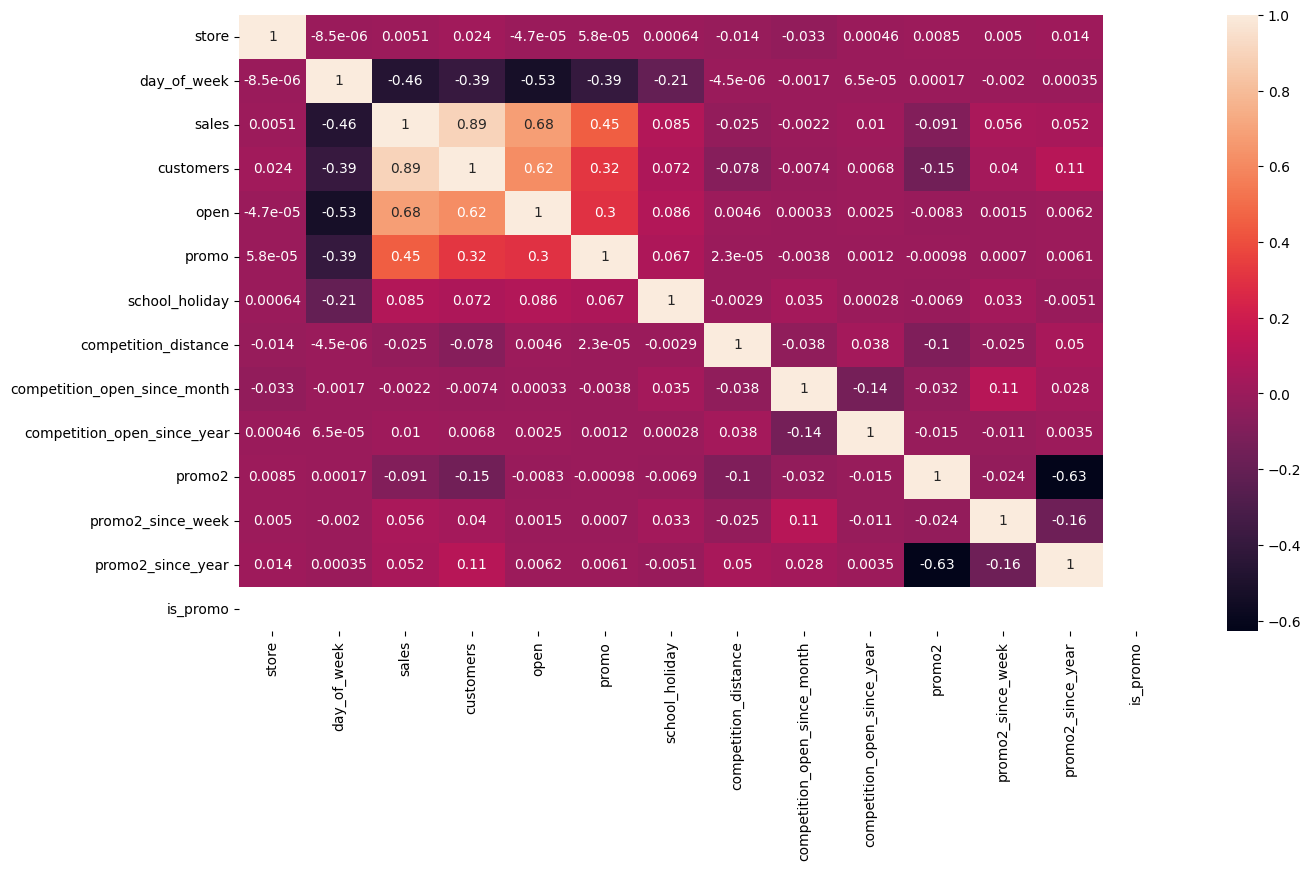

In [263]:
plt.figure(figsize=(15,8))
correlation = num_attributes.corr(method="pearson")
sns.heatmap(correlation, annot=True)

### 4.3.1. Categorical Atributes

In [280]:
from scipy import stats as ss

In [264]:
a = df4.select_dtypes(include="object")

In [273]:
a.head()

,state_holiday,store_type,assortment,promo_interval,month_map,year_week,promo_since
0,regular_day,c,basic,0,jul,2015-5,2015.0-31
1,regular_day,a,basic,"Jan,Apr,Jul,Oct",jul,2015-5,2010.0-13
2,regular_day,a,basic,"Jan,Apr,Jul,Oct",jul,2015-5,2011.0-14
3,regular_day,c,extended,0,jul,2015-5,2015.0-31
4,regular_day,a,basic,0,jul,2015-5,2015.0-31


In [ ]:
cm = pd.crosstab(a["state_holiday"], a["store_type"]).values # temos que passar para array, nesta versao do pandas nao temos o as_matrix() entao foi usado o .value

In [295]:
chi2 = ss.chi2_contingency(cm)[0] # cm confusion matrix -ou crosstab tabela de contingencia ele faz as combinaçoes e conta o numero de linhas

In [296]:
chi2 # ki quadrado esta pronto
n = cm.sum()
r, k = cm.shape


In [297]:
v = np.sqrt((chi2/n) / (min(k-1, r-1)) )

In [301]:
print("O valor é: ", v)

O valor é:  0.07106457093267678


In [305]:
# Podemos criar uma função com esta equaçao de cramer

def cramer(x, y):
    cm = pd.crosstab(x, y).values # temos que passar para array, nesta versao do pandas nao temos o as_matrix() entao foi usado o .value
    n = cm.sum()
    chi2 = ss.chi2_contingency(cm)[0] # cm confusion matrix -ou crosstab tabela de contingencia ele faz as combinaçoes e conta o numero de linhas
    r, k = cm.shape # r = linas rows e k = colunas colums
    return np.sqrt((chi2/n) / (min(k-1, r-1)) )


In [306]:
cramer(a["state_holiday"], a["store_type"])

0.07106457093267678

### Temos que fazer o Bias Corretion que regula a força do vies ele pode sobreestimar os dados

In [311]:

def cramerBiasCorr(x, y):
    cm = pd.crosstab(x, y).values # temos que passar para array, nesta versao do pandas nao temos o as_matrix() entao foi usado o .value
    n = cm.sum()
    r, k = cm.shape # r = linas rows e k = colunas colums
    chi2 = ss.chi2_contingency(cm)[0] # cm confusion matrix -ou crosstab tabela de contingencia ele faz as combinaçoes e conta o numero de linhas
    chi2corr = max(0, chi2 - (k-1) * (r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)) )



In [312]:
cramerBiasCorr(a["state_holiday"], a["store_type"])

0.07106469715258833

Vamos criar a matrix

In [318]:
a1 = cramerBiasCorr(a["state_holiday"], a["state_holiday"])
a2 = cramerBiasCorr(a["state_holiday"], a["store_type"])
a3 = cramerBiasCorr(a["state_holiday"], a["assortment"])

a4 = cramerBiasCorr(a["store_type"], a["state_holiday"])
a5 = cramerBiasCorr(a["store_type"], a["store_type"])
a6 = cramerBiasCorr(a["store_type"], a["assortment"])

a7 = cramerBiasCorr(a["assortment"], a["state_holiday"])
a8 = cramerBiasCorr(a["assortment"], a["store_type"])
a9 = cramerBiasCorr(a["assortment"], a["assortment"])

d = pd.DataFrame({"state_holiday" : [a1, a2, a3],
              "store_type" : [a4, a5, a6],
            "assortment" :[a7, a8, a9]})

d = d.set_index(d.columns)
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


<Axes: >

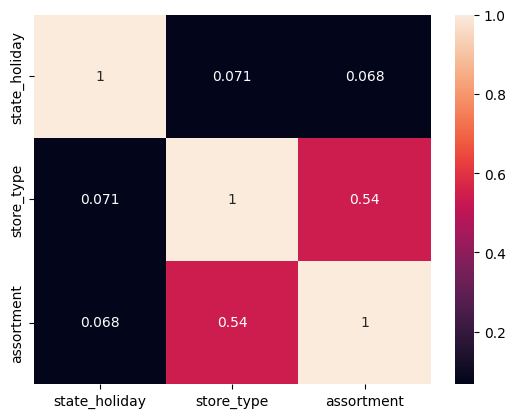

In [322]:

sns.heatmap(d, annot=True)

# 5.0 PASSO 05 (modulo 5) - DATA PREPARATION

In [341]:
df5 = df4.copy()

## 5.1 Normalização

Os dados nao sao uma distribuição normal, portanto nao faremos a normalização

## 5.2 Rescaling

In [346]:
a = df5.select_dtypes(include=["int64","float64", "int32"])

In [345]:
df5.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
year                                     int32
month        

In [347]:
a.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,compatition_time_month
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015.0,0,2015,7,31,4,84
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010.0,0,2015,7,31,4,94
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011.0,0,2015,7,31,4,105
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015.0,0,2015,7,31,4,71
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015.0,0,2015,7,31,4,4


Vamos escolher quais variaveis vamos aplicar o MIN mAX

<Axes: ylabel='competition_distance'>

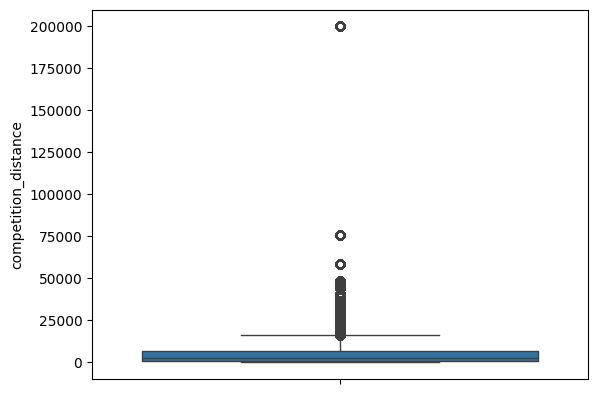

In [348]:
sns.boxplot(df5["competition_distance"])

<Axes: ylabel='compatition_time_month'>

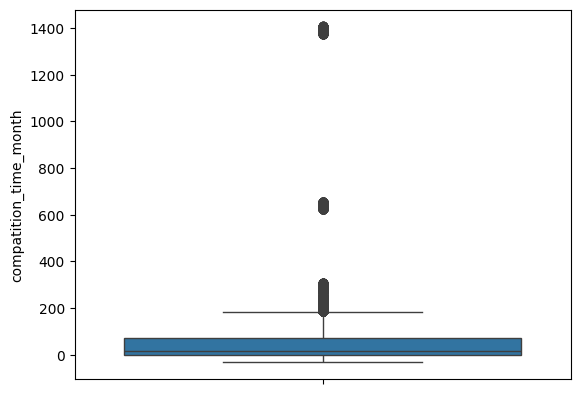

In [354]:
sns.boxplot(df5["compatition_time_month"])
# temos outlier tambem

In [356]:
from sklearn.preprocessing import RobustScaler,  MinMaxScaler
# g

In [358]:
# temos que ver se iremos utilizar o min max scaler ou o Robust - o que determina é se tem outlier ou nao
# competition_distance - Robust scaler pois temos outlier (colocado por nos em outro passo para remover o NA)
rs = RobustScaler()
mms = MinMaxScaler()
df5["competition_distance"] = rs.fit_transform(df5[["competition_distance"]].values)


# compatition_time_month
df5["compatition_time_month"] = rs.fit_transform(df5[["compatition_time_month"]].values)

# year (ciclico)

df5["year"] = mms.fit_transform(df5[["year"]].values)

# day_of_week


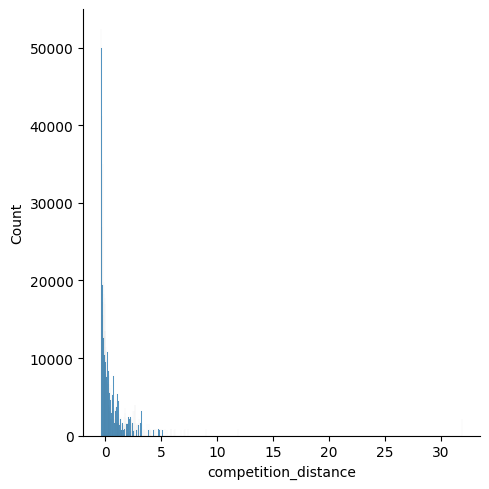

In [359]:
sns.displot(df5["competition_distance"])

In [ ]:
# year (ciclico)
# month (ciclico)
# day (ciclico)
# week_of_year (ciclico)


## 5.3 Transformação

### 5.3.1 Encoding

In [366]:
df5.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,jul,0,1.0,7,31,4,2015-5,2008-09-01,0.918919,2015.0-31
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,jul,0,1.0,7,31,4,2015-5,2007-11-01,1.054054,2010.0-13
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,jul,0,1.0,7,31,4,2015-5,2006-12-01,1.202703,2011.0-14
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,jul,0,1.0,7,31,4,2015-5,2009-09-01,0.743243,2015.0-31
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,jul,0,1.0,7,31,4,2015-5,2015-04-01,-0.162162,2015.0-31


In [ ]:
# state_holiday - Vamos usar o One hot encoding
df5 = pd.get_dummies(df5, prefix=["state_holiday"], columns=["state_holiday"])


In [368]:
df5.head()

,store,day_of_week,date,sales,customers,open,promo,school_holiday,store_type,assortment,...,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since,state_holiday_Easter_holiday,state_holiday_christmas,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,555,1,1,1,c,basic,...,31,4,2015-5,2008-09-01,0.918919,2015.0-31,False,False,False,True
1,2,5,2015-07-31,6064,625,1,1,1,a,basic,...,31,4,2015-5,2007-11-01,1.054054,2010.0-13,False,False,False,True
2,3,5,2015-07-31,8314,821,1,1,1,a,basic,...,31,4,2015-5,2006-12-01,1.202703,2011.0-14,False,False,False,True
3,4,5,2015-07-31,13995,1498,1,1,1,c,extended,...,31,4,2015-5,2009-09-01,0.743243,2015.0-31,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,1,a,basic,...,31,4,2015-5,2015-04-01,-0.162162,2015.0-31,False,False,False,True


In [ ]:
# store_type - Nao tem uma ordem para esta coluna. Vamos usar um label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df5["store_type"] = le.fit_transform(df5["store_type"])


In [370]:
df5.head() # veja que foi trocado as letras pelos numeros

,store,day_of_week,date,sales,customers,open,promo,school_holiday,store_type,assortment,...,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since,state_holiday_Easter_holiday,state_holiday_christmas,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,555,1,1,1,2,basic,...,31,4,2015-5,2008-09-01,0.918919,2015.0-31,False,False,False,True
1,2,5,2015-07-31,6064,625,1,1,1,0,basic,...,31,4,2015-5,2007-11-01,1.054054,2010.0-13,False,False,False,True
2,3,5,2015-07-31,8314,821,1,1,1,0,basic,...,31,4,2015-5,2006-12-01,1.202703,2011.0-14,False,False,False,True
3,4,5,2015-07-31,13995,1498,1,1,1,2,extended,...,31,4,2015-5,2009-09-01,0.743243,2015.0-31,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,1,0,basic,...,31,4,2015-5,2015-04-01,-0.162162,2015.0-31,False,False,False,True


In [371]:
df5["assortment"].drop_duplicates() # veja que tem uma ordem basic e menor que extra e menor que extended
# neste caso podemos usar esta mesma ordem com o endoding ordinal

0         basic
3      extended
258       extra
Name: assortment, dtype: object

In [372]:
# assortment
assortment_dict = {"basic": 1, "extra": 2, "extended":3}
df5["assortment"] = df5["assortment"].map(assortment_dict) # estamos usando o dicionario criado acima para passar os valores, estamos usando o metodo map para passar por cada linha
# sera feito a substituicao tudo que for basic sera igual a 1 e extra 2 extended 3


In [374]:
df5.head()

,store,day_of_week,date,sales,customers,open,promo,school_holiday,store_type,assortment,...,day,week_of_year,year_week,competition_since,compatition_time_month,promo_since,state_holiday_Easter_holiday,state_holiday_christmas,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,555,1,1,1,2,1,...,31,4,2015-5,2008-09-01,0.918919,2015.0-31,False,False,False,True
1,2,5,2015-07-31,6064,625,1,1,1,0,1,...,31,4,2015-5,2007-11-01,1.054054,2010.0-13,False,False,False,True
2,3,5,2015-07-31,8314,821,1,1,1,0,1,...,31,4,2015-5,2006-12-01,1.202703,2011.0-14,False,False,False,True
3,4,5,2015-07-31,13995,1498,1,1,1,2,3,...,31,4,2015-5,2009-09-01,0.743243,2015.0-31,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,1,0,1,...,31,4,2015-5,2015-04-01,-0.162162,2015.0-31,False,False,False,True


### 5.3.2 Response Variable Transformation 

In [375]:
df5["sales"] = np.log1p( df5["sales"])

/var/folders/h2/hhdc5h252450trz8cl4n_zrc0000gn/T/ipykernel_93974/1421893533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5["sales"]);


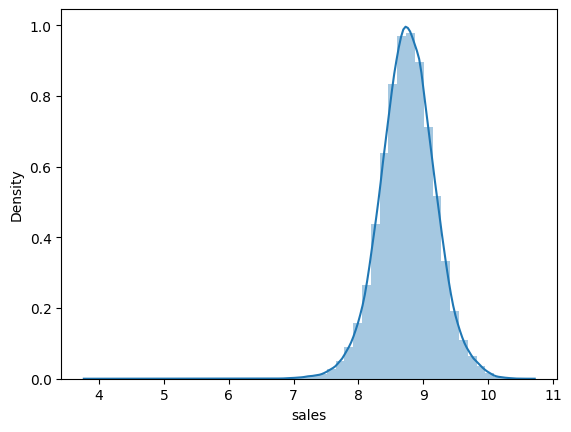

In [380]:
sns.distplot(df5["sales"]);

### 5.3.2 Nature transformation

In [385]:
# day_of_week

df5["day_of_week_sin"] = df5["day_of_week"].apply(lambda x: np.sin(x * (2. * np.pi/7 ) ) ) # 7 pois a cada semana temos 7 dias
df5["day_of_week_cos"] = df5["day_of_week"].apply(lambda x: np.cos(x * (2. * np.pi/7 ) ) ) # 7 pois a cada semana temos 7 dias

# year
# nao repitimos o ano, entao nao temos ciclos
# month
#df5["month_sin"] = df5["month"].apply(lambda x: np.sin(x * (2. * np.pi/12 ) ) ) # 
#df5["month_cos"] = df5["month"].apply(lambda x: np.cos(x * (2. * np.pi/12 ) ) ) # 

# day
df5["day_sin"] = df5["day"].apply(lambda x: np.sin(x * (2. * np.pi/12 ) ) ) # 30 e a media de dias no mes
df5["day_cos"] = df5["day"].apply(lambda x: np.cos(x * (2. * np.pi/12 ) ) ) # 30 e a media de dias no mes
# week_of_year

df5["week_of_year_sin"] = df5["week_of_year"].apply(lambda x: np.sin(x * (2. * np.pi/12 ) ) ) # 52 semanas no ano
df5["week_of_year_cos"] = df5["week_of_year"].apply(lambda x: np.cos(x * (2. * np.pi/12 ) ) ) # 52 semanas no ano

# year_week

In [386]:
df5.head()

,store,day_of_week,date,sales,customers,open,promo,school_holiday,store_type,assortment,...,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,555,1,1,1,2,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
1,2,5,2015-07-31,8.710290,625,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
2,3,5,2015-07-31,9.025816,821,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
3,4,5,2015-07-31,9.546527,1498,1,1,1,2,3,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
4,5,5,2015-07-31,8.481151,559,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5


# 6.0. PASSO 06 - FEATURE SELECTION

In [387]:
# é importante fazer a copia do Dataframe do passo anterior, para nao ter que fazer o run de tudo novamente.
df6 = df5.copy()

## 6.1 Split dataframe into training and test dataset

In [390]:
# as colunas (variaveis) derivadas como week_of_year seno e coseno foram adicionadas, temos que remover a 
# coluna original
df6.head()
#day_of_week
#month
#day
#week_of_year
#promo_since
# competition_since


,store,day_of_week,date,sales,customers,open,promo,school_holiday,store_type,assortment,...,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,555,1,1,1,2,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
1,2,5,2015-07-31,8.710290,625,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
2,3,5,2015-07-31,9.025816,821,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
3,4,5,2015-07-31,9.546527,1498,1,1,1,2,3,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5
4,5,5,2015-07-31,8.481151,559,1,1,1,0,1,...,False,True,-0.5,-0.866025,-0.974928,-0.222521,-0.5,-0.866025,0.866025,-0.5


In [391]:
cols_drop = ["day_of_week","month","day", "week_of_year", "promo_since", "competition_since"]
df6 = df6.drop(cols_drop, axis=1) # axis=1 significa ao logo das linhas, para deletar a coluna inteira

In [ ]:
# Overfit o modelo decora os dados
# nao podemos passar todos os dados pois temos diferentes linhas de tempo se passar tudo teremos dados do passado e ano futuro chances de overfit
# vamos pegar as ultimas 6 semanas e separar para os dados de teste
# tudo que for anterior as 6 semanas serao nosso dado de treino
df6[ "store", "date"].groupby("store").min().reset_index()


## 6.2 Boruta as Feature Selector